# Usefull Imports

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import dataset

In [41]:
data = pd.read_csv('regularite-mensuelle-tgv-aqst.csv',delimiter=";")
df = data.copy()
df.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [43]:
df.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,...,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,NaN,88.434265,11.205745,3.076737,NaN,34.516066,33.950971,...,24.434511,32.193823,11.642016,4.245892,23.266846,21.888418,19.052124,18.995179,6.714513,7.127315
std,87.390774,173.815703,26.544553,NaN,90.384803,12.476780,5.432676,NaN,29.729349,15.702663,...,21.400761,20.195926,11.225104,4.901032,16.805192,15.692521,14.947548,14.256533,8.080759,10.249453
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,...,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,NaN,22.000000,5.128410,1.140258,NaN,13.000000,24.636941,...,9.000000,12.140350,4.000000,1.000000,11.764706,11.538462,8.695652,9.523810,0.000000,0.000000
50%,164.000000,221.000000,3.000000,NaN,55.000000,9.036447,2.248271,NaN,27.000000,32.441236,...,19.000000,34.932765,9.000000,3.000000,20.967742,20.000000,16.949153,17.165179,5.000000,3.703704
75%,221.000000,333.000000,10.000000,NaN,129.000000,14.219375,3.903651,NaN,47.000000,41.346717,...,33.000000,44.268749,16.000000,6.000000,32.307692,30.000000,26.923077,26.086957,10.000000,10.000000
max,786.000000,1075.000000,297.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,299.600000,...,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<Axes: >

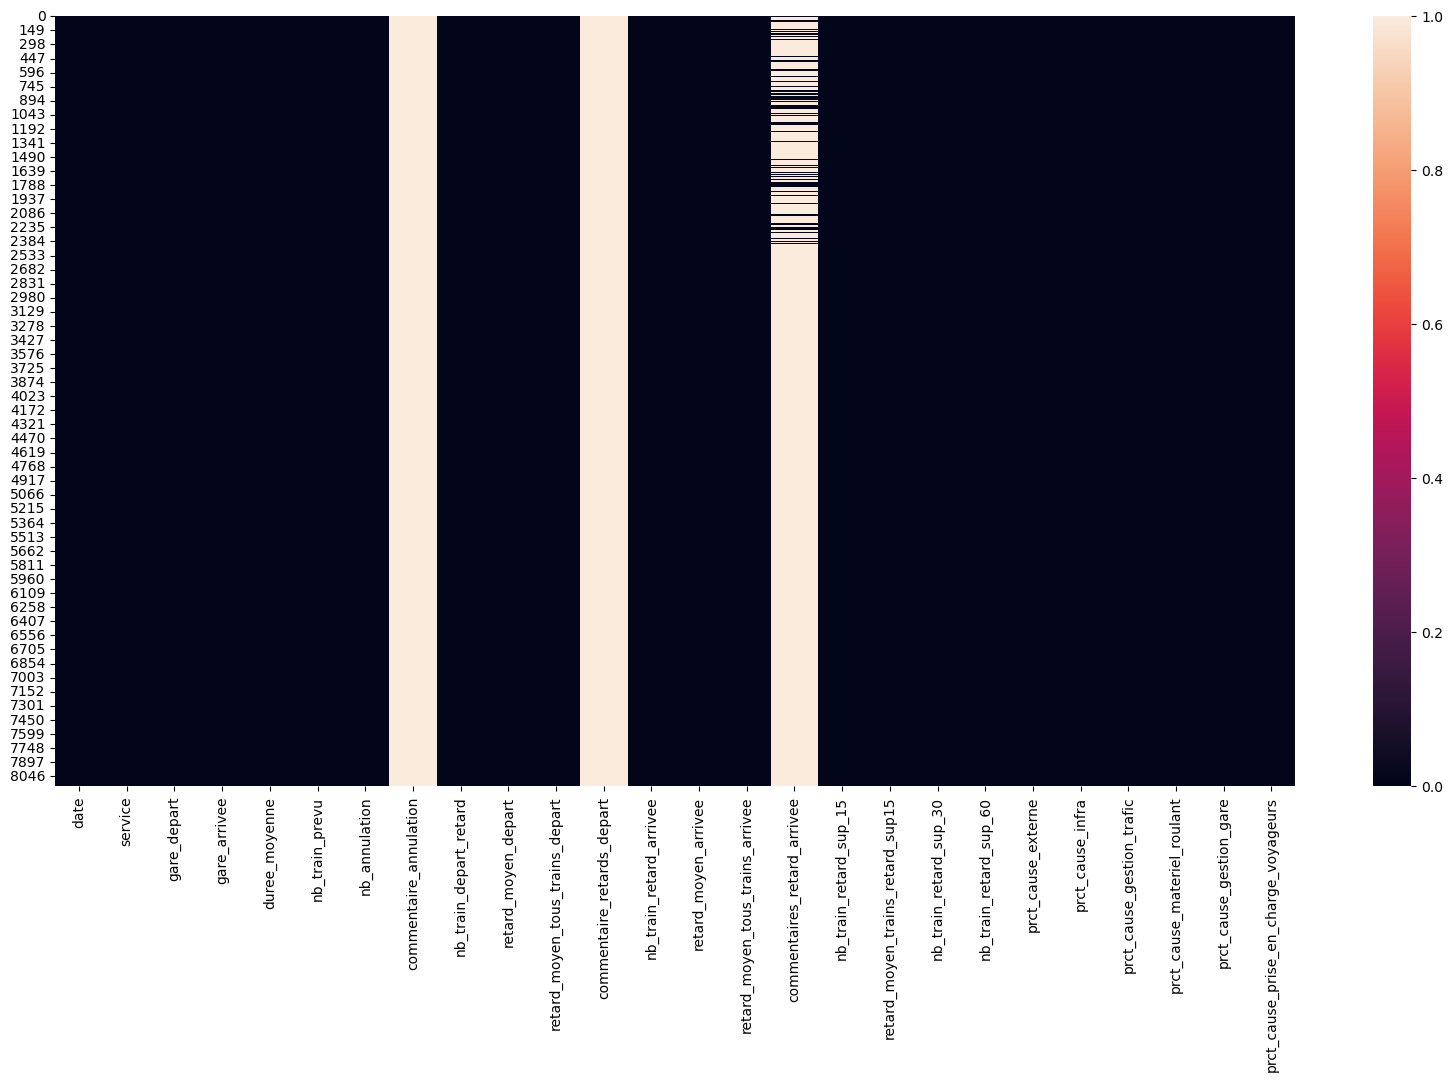

In [44]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna()) # Presenter les valeurs manquantes

# Data Preprocessing

In [45]:
df[['année', 'mois']] = df['date'].str.split('-', expand=True)
df = df[df.retard_moyen_arrivee >= 0]
df

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,année,mois
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,2018,01
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,2018,01
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,2018,01
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,2018,01
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,2018,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06,National,STRASBOURG,PARIS EST,114,492,2,NaN,273,11.989927,...,31,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286,2023,06
8150,2023-06,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,NaN,24,28.730556,...,24,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667,2023,06
8151,2023-06,National,TOURS,PARIS MONTPARNASSE,78,192,1,NaN,20,31.281667,...,7,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286,2023,06
8152,2023-06,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,NaN,347,13.517051,...,62,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828,2023,06


In [46]:
df = df.drop(['date',\
              'commentaire_annulation',\
              'commentaire_retards_depart',\
              'commentaires_retard_arrivee'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8152 entries, 0 to 8153
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   service                               8152 non-null   object 
 1   gare_depart                           8152 non-null   object 
 2   gare_arrivee                          8152 non-null   object 
 3   duree_moyenne                         8152 non-null   int64  
 4   nb_train_prevu                        8152 non-null   int64  
 5   nb_annulation                         8152 non-null   int64  
 6   nb_train_depart_retard                8152 non-null   int64  
 7   retard_moyen_depart                   8152 non-null   float64
 8   retard_moyen_tous_trains_depart       8152 non-null   float64
 9   nb_train_retard_arrivee               8152 non-null   int64  
 10  retard_moyen_arrivee                  8152 non-null   float64
 11  retard_moyen_tous_trai

# Features analyses

## L'impact des services

<Axes: ylabel='count'>

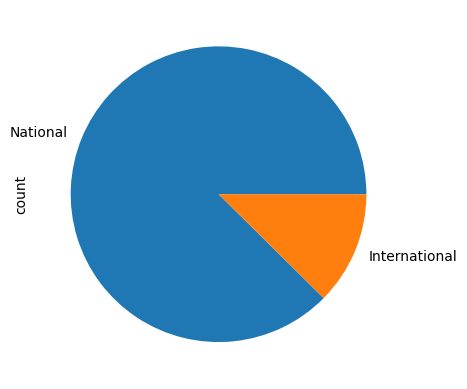

In [47]:
df['service'].value_counts().plot.pie()

<Axes: xlabel='service', ylabel='retard_moyen_arrivee'>

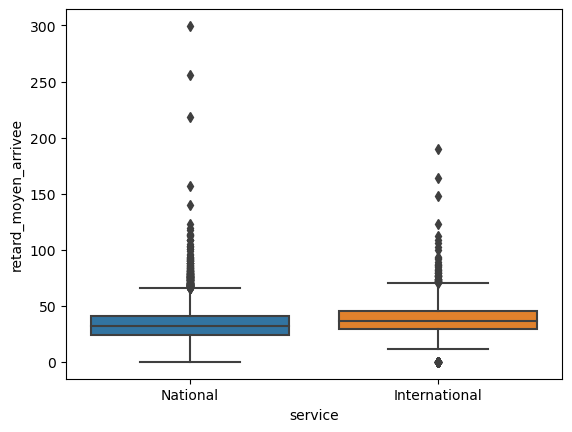

In [48]:
sns.boxplot(x='service', y='retard_moyen_arrivee', data=df)

## L'impact des gares

In [49]:
df_retard_moyen_gare = df.groupby('gare_depart')['retard_moyen_depart'].mean().reset_index()\
.rename(columns={'gare_depart':'gare'})\
.merge(\
                       df.groupby('gare_arrivee')['retard_moyen_arrivee'].mean().reset_index()\
.rename(columns={'gare_arrivee':'gare'}), how='inner')
df_retard_moyen_gare

,gare,retard_moyen_depart,retard_moyen_arrivee
0,AIX EN PROVENCE TGV,8.315476,43.277057
1,ANGERS SAINT LAUD,7.227171,26.537078
2,ANGOULEME,7.048854,29.699267
3,ANNECY,18.472763,39.985935
4,ARRAS,7.771044,22.965465
5,AVIGNON TGV,9.007538,35.437438
6,BARCELONA,5.090036,38.520222
7,BELLEGARDE (AIN),6.410011,31.149497
8,BESANCON FRANCHE COMTE TGV,7.285956,33.185815
9,BORDEAUX ST JEAN,10.910950,38.071437


## L'impact des mois

In [50]:
df_retard_moyen_date = df.groupby(['année', 'mois'])[['nb_train_prevu', 'retard_moyen_arrivee']].mean().reset_index()
df_retard_moyen_date

,année,mois,nb_train_prevu,retard_moyen_arrivee
0,2018,01,271.230769,33.060094
1,2018,02,249.376923,35.288889
2,2018,03,272.753846,32.970499
3,2018,04,278.792308,28.952748
4,2018,05,277.776923,33.127178
...,...,...,...,...
61,2023,02,276.471074,34.055371
62,2023,03,309.884298,46.408209
63,2023,04,301.446281,41.055709
64,2023,05,304.537190,35.093611


<Axes: xlabel='mois', ylabel='nb_train_prevu'>

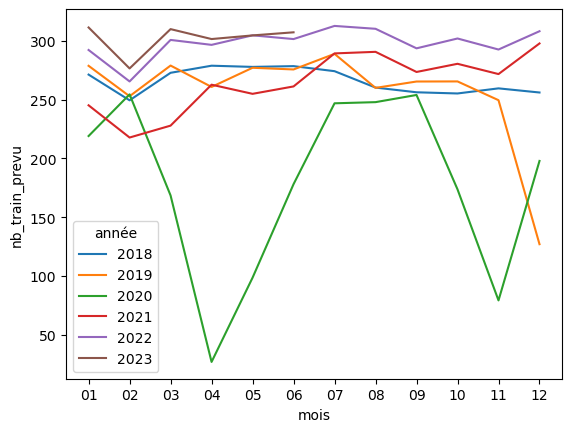

In [51]:
sns.lineplot(data = df_retard_moyen_date, x='mois', y='nb_train_prevu', hue='année')

<Axes: xlabel='mois', ylabel='retard_moyen_arrivee'>

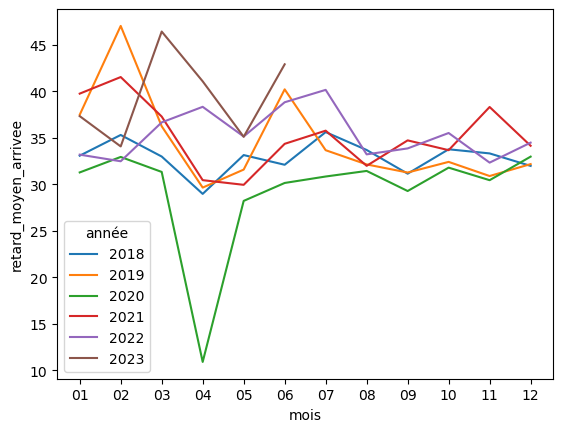

In [52]:
sns.lineplot(data = df_retard_moyen_date, x='mois', y='retard_moyen_arrivee', hue='année')

<Axes: >

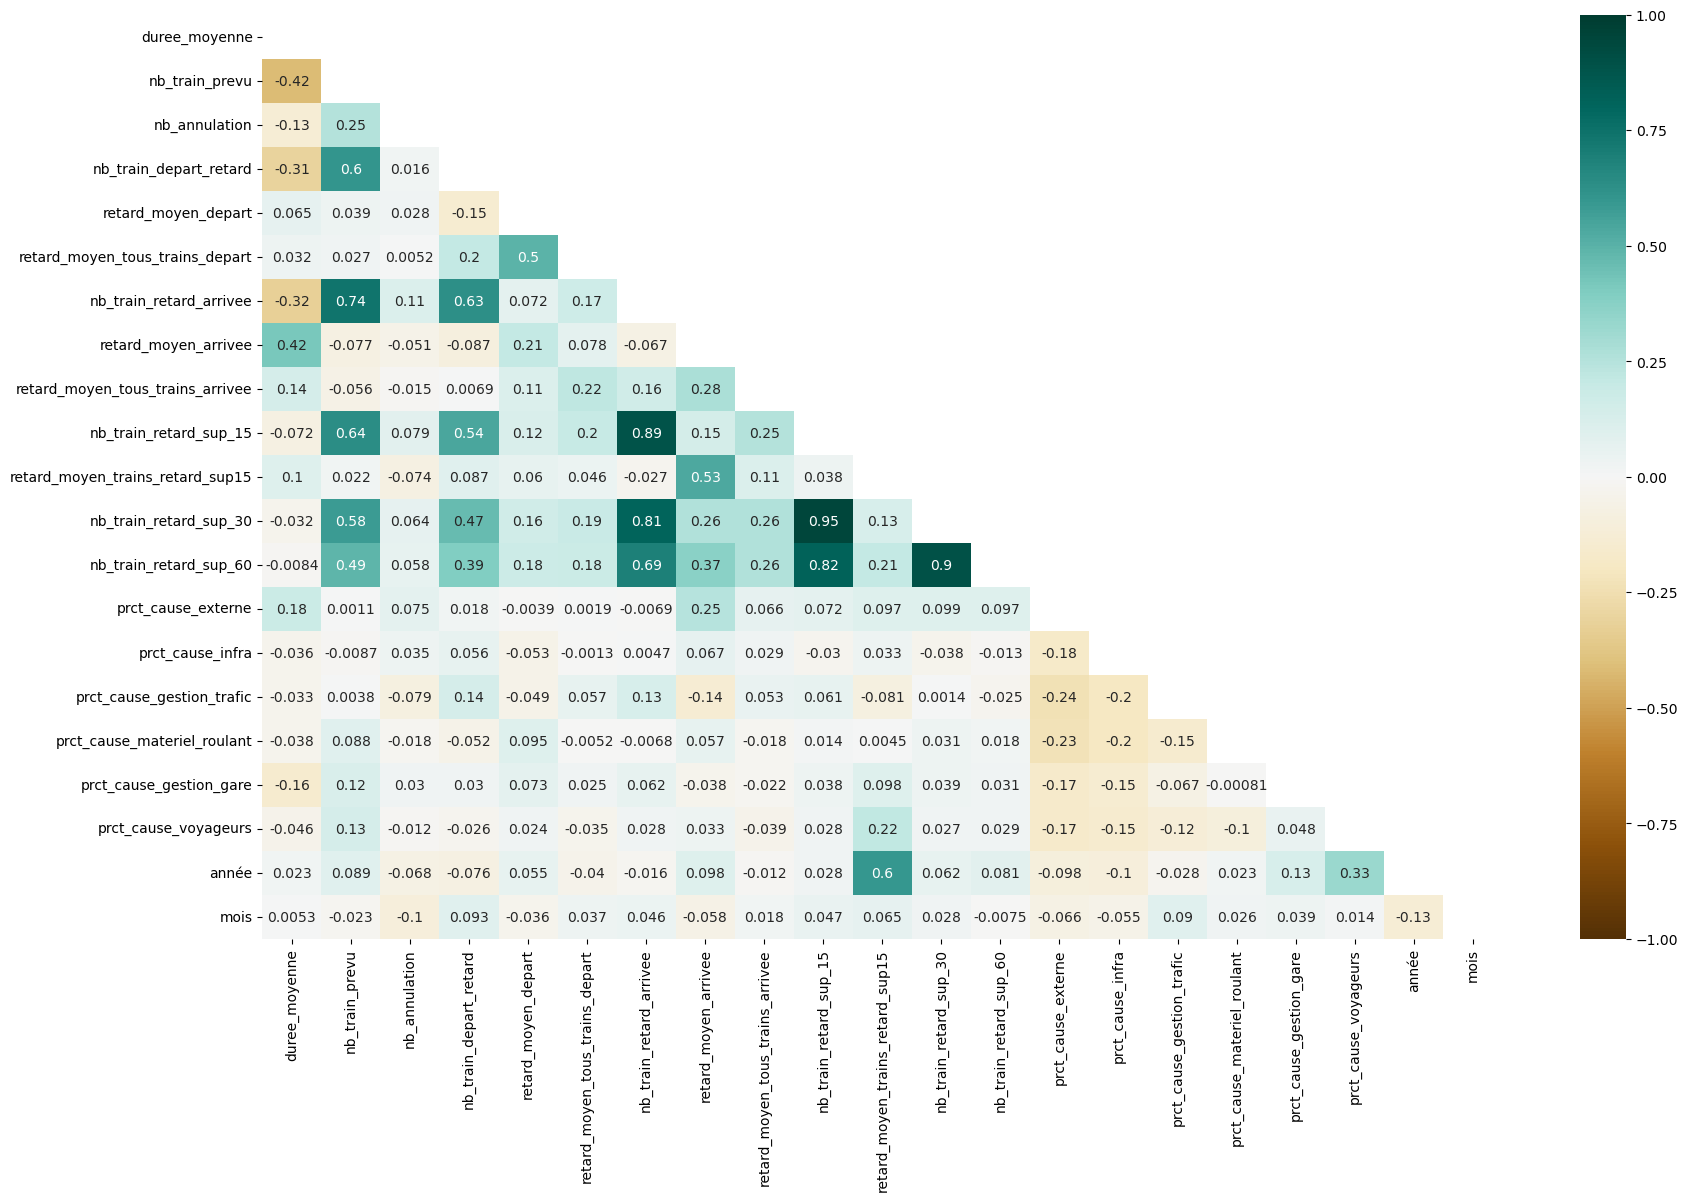

In [55]:
plt.figure(figsize=(20, 12))
df = df.rename(columns={'prct_cause_prise_en_charge_voyageurs':'prct_cause_voyageurs'})
correlation_matrix = df.drop(['service', 'gare_depart', 'gare_arrivee'], axis=1).corr()
#sns.heatmap(df.drop(['service', 'gare_depart', 'gare_arrivee'], axis = 1).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')